In [1]:
from logica import *
from ambientes import *
from agentes import *
from utils import *
from IPython.display import clear_output

In [2]:
#Implementación del entorno
#Inicializamos el mundo y percibimos lo que hay en la primera casilla
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
state = W.reset()
print(state)

[None, 'brisa', None, None, None]


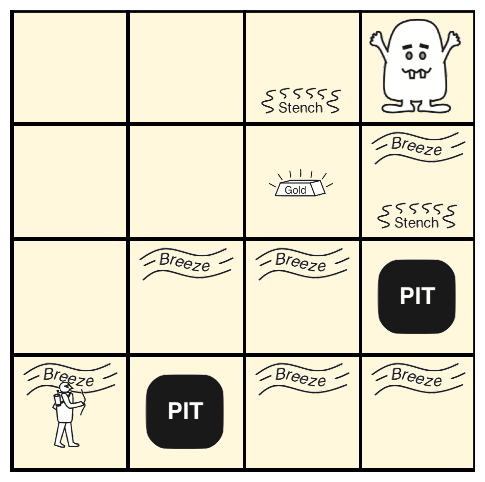

In [3]:
W.pintar_todo()

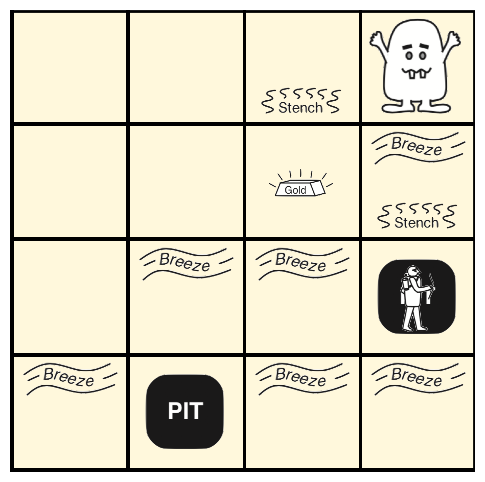

¡Juego terminado!
El héroe ha caído en un pozo
Puntaje: -1006


In [4]:
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
#Create agent
agente = Heroe()
#Create episode
episodio = Episode(environment=W, agent=agente, model_name='Baseline', num_rounds=10)
#Include plan
camino = [(0,0), (0,1), (1,1), (2,1), (3,1)]
acciones = agente.acciones_camino(camino)
agente.plan += acciones
#Visualize
episodio.renderize()
#Presentar resumen
clear_output()
W.pintar_todo()
print(W.mensaje)

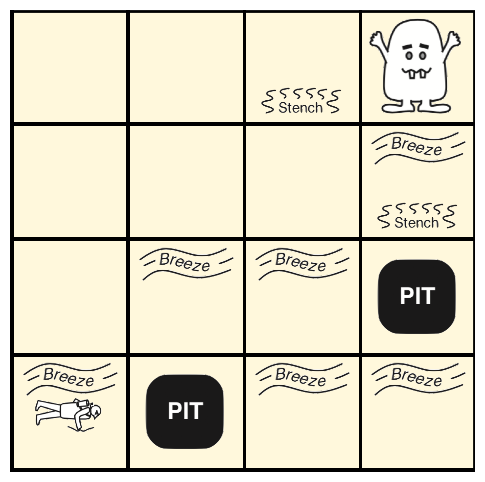

Juego terminado!
 Puntaje: 986


In [5]:
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
#Create agent
agente = Heroe()
#Create episode
episodio = Episode(environment=W, agent=agente, model_name='Baseline', num_rounds=20)
#Include plan
camino = [(0,0), (0,1), (0,2), (1,2), (2,2)]
acciones = agente.acciones_camino(camino)
agente.plan += acciones
#Visualize
episodio.renderize()
#Presentar resumen
clear_output()
W.pintar_todo()
print(W.mensaje)

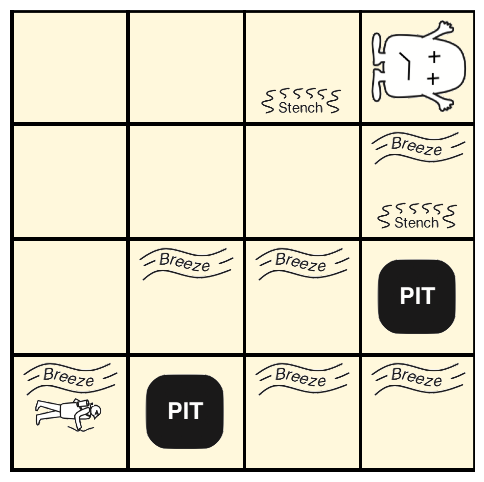

Juego terminado!
 Puntaje: 971


In [6]:
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
#Create agent
agente = Heroe()
#Create episode
episodio = Episode(environment=W, agent=agente, model_name='Baseline', num_rounds=20)
#Include plan
camino_arriba = [(0,0), (0,1), (0,2), (0,3)]
acciones = agente.acciones_camino(camino_arriba)
acciones += ['voltearDerecha', 'disparar']
agente.plan += acciones
camino_al_oro = [(0,3), (0,2), (1,2), (2,2)]
acciones = agente.acciones_camino(camino_al_oro)
acciones += ['agarrar', 'salir']
agente.plan += acciones
#Visialize
episodio.renderize()
#Presentar resumen
clear_output()
W.pintar_todo()
print(W.mensaje)

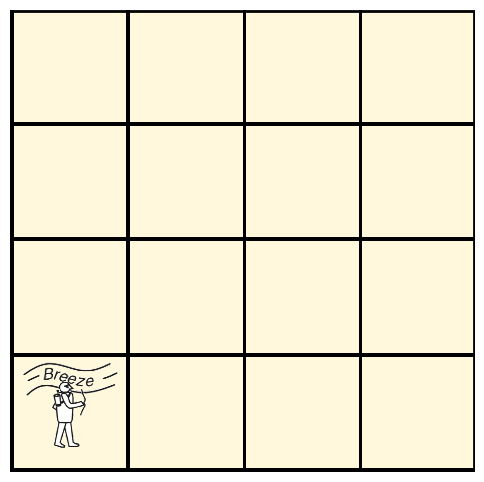

-hedor(0, 0)&brisa(0, 0)&-brillo(0, 0)&-batacazo(0, 0)&-grito(0, 0)


In [7]:
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
state = W.reset()
W.render()
agente = Heroe()
agente.states.append(state)
print(agente.interp_percepto())

In [8]:
def brisa_pozo(self):
    formulas = []
    for fila in range(4):
        for columna in range(4):
            formulas += [f'-brisa({fila}, {columna})>-pozo({fila+1}, {columna})']
            formulas += [f'-brisa({fila}, {columna})>-pozo({fila}, {columna+1})']
            formulas += [f'-brisa({fila}, {columna})>-pozo({fila-1}, {columna})']
            formulas += [f'-brisa({fila}, {columna})>-pozo({fila}, {columna-1})']
    return formulas

setattr(Heroe, 'brisa_pozo', brisa_pozo)

agente = Heroe()
agente.brisa_pozo()

['-brisa(0, 0)>-pozo(1, 0)',
 '-brisa(0, 0)>-pozo(0, 1)',
 '-brisa(0, 0)>-pozo(-1, 0)',
 '-brisa(0, 0)>-pozo(0, -1)',
 '-brisa(0, 1)>-pozo(1, 1)',
 '-brisa(0, 1)>-pozo(0, 2)',
 '-brisa(0, 1)>-pozo(-1, 1)',
 '-brisa(0, 1)>-pozo(0, 0)',
 '-brisa(0, 2)>-pozo(1, 2)',
 '-brisa(0, 2)>-pozo(0, 3)',
 '-brisa(0, 2)>-pozo(-1, 2)',
 '-brisa(0, 2)>-pozo(0, 1)',
 '-brisa(0, 3)>-pozo(1, 3)',
 '-brisa(0, 3)>-pozo(0, 4)',
 '-brisa(0, 3)>-pozo(-1, 3)',
 '-brisa(0, 3)>-pozo(0, 2)',
 '-brisa(1, 0)>-pozo(2, 0)',
 '-brisa(1, 0)>-pozo(1, 1)',
 '-brisa(1, 0)>-pozo(0, 0)',
 '-brisa(1, 0)>-pozo(1, -1)',
 '-brisa(1, 1)>-pozo(2, 1)',
 '-brisa(1, 1)>-pozo(1, 2)',
 '-brisa(1, 1)>-pozo(0, 1)',
 '-brisa(1, 1)>-pozo(1, 0)',
 '-brisa(1, 2)>-pozo(2, 2)',
 '-brisa(1, 2)>-pozo(1, 3)',
 '-brisa(1, 2)>-pozo(0, 2)',
 '-brisa(1, 2)>-pozo(1, 1)',
 '-brisa(1, 3)>-pozo(2, 3)',
 '-brisa(1, 3)>-pozo(1, 4)',
 '-brisa(1, 3)>-pozo(0, 3)',
 '-brisa(1, 3)>-pozo(1, 2)',
 '-brisa(2, 0)>-pozo(3, 0)',
 '-brisa(2, 0)>-pozo(2, 1)',
 '-brisa

In [9]:
def hedor_wumpus(self):
    formulas = []
    for fila in range(4):
        for columna in range(4):
            formulas += [f'-hedor({fila}, {columna})>-wumpus({fila+1}, {columna})']
            formulas += [f'-hedor({fila}, {columna})>-wumpus({fila}, {columna+1})']
            formulas += [f'-hedor({fila}, {columna})>-wumpus({fila-1}, {columna})']
            formulas += [f'-hedor({fila}, {columna})>-wumpus({fila}, {columna-1})']
    return formulas

setattr(Heroe, 'hedor_wumpus', hedor_wumpus)

agente = Heroe()
agente.hedor_wumpus()

['-hedor(0, 0)>-wumpus(1, 0)',
 '-hedor(0, 0)>-wumpus(0, 1)',
 '-hedor(0, 0)>-wumpus(-1, 0)',
 '-hedor(0, 0)>-wumpus(0, -1)',
 '-hedor(0, 1)>-wumpus(1, 1)',
 '-hedor(0, 1)>-wumpus(0, 2)',
 '-hedor(0, 1)>-wumpus(-1, 1)',
 '-hedor(0, 1)>-wumpus(0, 0)',
 '-hedor(0, 2)>-wumpus(1, 2)',
 '-hedor(0, 2)>-wumpus(0, 3)',
 '-hedor(0, 2)>-wumpus(-1, 2)',
 '-hedor(0, 2)>-wumpus(0, 1)',
 '-hedor(0, 3)>-wumpus(1, 3)',
 '-hedor(0, 3)>-wumpus(0, 4)',
 '-hedor(0, 3)>-wumpus(-1, 3)',
 '-hedor(0, 3)>-wumpus(0, 2)',
 '-hedor(1, 0)>-wumpus(2, 0)',
 '-hedor(1, 0)>-wumpus(1, 1)',
 '-hedor(1, 0)>-wumpus(0, 0)',
 '-hedor(1, 0)>-wumpus(1, -1)',
 '-hedor(1, 1)>-wumpus(2, 1)',
 '-hedor(1, 1)>-wumpus(1, 2)',
 '-hedor(1, 1)>-wumpus(0, 1)',
 '-hedor(1, 1)>-wumpus(1, 0)',
 '-hedor(1, 2)>-wumpus(2, 2)',
 '-hedor(1, 2)>-wumpus(1, 3)',
 '-hedor(1, 2)>-wumpus(0, 2)',
 '-hedor(1, 2)>-wumpus(1, 1)',
 '-hedor(1, 3)>-wumpus(2, 3)',
 '-hedor(1, 3)>-wumpus(1, 4)',
 '-hedor(1, 3)>-wumpus(0, 3)',
 '-hedor(1, 3)>-wumpus(1, 2)',
 '

In [10]:
def casilla_segura(self):
    formulas = []
    for fila in range(4):
        for columna in range(4):
            formulas += [f'-pozo({fila}, {columna})&-wumpus({fila}, {columna})>segura({fila}, {columna})']
    return formulas

setattr(Heroe, 'casilla_segura', casilla_segura)

agente = Heroe()
agente.casilla_segura()

['-pozo(0, 0)&-wumpus(0, 0)>segura(0, 0)',
 '-pozo(0, 1)&-wumpus(0, 1)>segura(0, 1)',
 '-pozo(0, 2)&-wumpus(0, 2)>segura(0, 2)',
 '-pozo(0, 3)&-wumpus(0, 3)>segura(0, 3)',
 '-pozo(1, 0)&-wumpus(1, 0)>segura(1, 0)',
 '-pozo(1, 1)&-wumpus(1, 1)>segura(1, 1)',
 '-pozo(1, 2)&-wumpus(1, 2)>segura(1, 2)',
 '-pozo(1, 3)&-wumpus(1, 3)>segura(1, 3)',
 '-pozo(2, 0)&-wumpus(2, 0)>segura(2, 0)',
 '-pozo(2, 1)&-wumpus(2, 1)>segura(2, 1)',
 '-pozo(2, 2)&-wumpus(2, 2)>segura(2, 2)',
 '-pozo(2, 3)&-wumpus(2, 3)>segura(2, 3)',
 '-pozo(3, 0)&-wumpus(3, 0)>segura(3, 0)',
 '-pozo(3, 1)&-wumpus(3, 1)>segura(3, 1)',
 '-pozo(3, 2)&-wumpus(3, 2)>segura(3, 2)',
 '-pozo(3, 3)&-wumpus(3, 3)>segura(3, 3)']

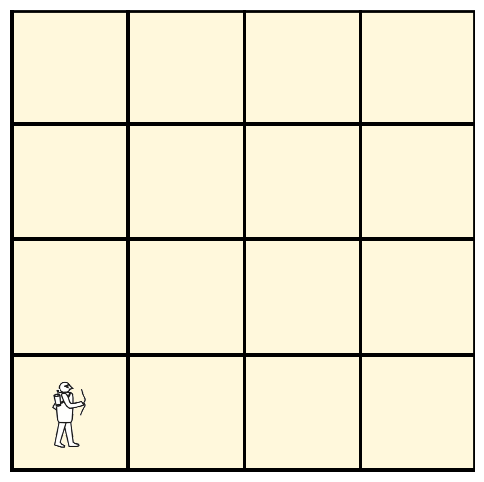

¡Base de conocimiento creada!
Hechos:
	-hedor(0, 0)
	-brisa(0, 0)
	-brillo(0, 0)
	-batacazo(0, 0)
	-grito(0, 0)

Reglas:
	-brisa(0, 0)>-pozo(1, 0)
	-brisa(0, 0)>-pozo(0, 1)
	-hedor(0, 0)>-wumpus(1, 0)
	-hedor(0, 0)>-wumpus(0, 1)
	-pozo(0, 0)&-wumpus(0, 0)>segura(0, 0)
	-pozo(0, 1)&-wumpus(0, 1)>segura(0, 1)
	-pozo(0, 2)&-wumpus(0, 2)>segura(0, 2)
	-pozo(0, 3)&-wumpus(0, 3)>segura(0, 3)
	-pozo(1, 0)&-wumpus(1, 0)>segura(1, 0)
	-pozo(1, 1)&-wumpus(1, 1)>segura(1, 1)
	-pozo(1, 2)&-wumpus(1, 2)>segura(1, 2)
	-pozo(1, 3)&-wumpus(1, 3)>segura(1, 3)
	-pozo(2, 0)&-wumpus(2, 0)>segura(2, 0)
	-pozo(2, 1)&-wumpus(2, 1)>segura(2, 1)
	-pozo(2, 2)&-wumpus(2, 2)>segura(2, 2)
	-pozo(2, 3)&-wumpus(2, 3)>segura(2, 3)
	-pozo(3, 0)&-wumpus(3, 0)>segura(3, 0)
	-pozo(3, 1)&-wumpus(3, 1)>segura(3, 1)
	-pozo(3, 2)&-wumpus(3, 2)>segura(3, 2)
	-pozo(3, 3)&-wumpus(3, 3)>segura(3, 3)



In [11]:
W = Wumpus(wumpus=(0,2), oro=(3,2), pozos=[(2,0)])
W.render()
agente = Heroe()
state = W.reset()
agente.states.append(state)
c = agente.interp_percepto()
for hecho in c.split('&'):
    agente.base.tell(hecho)
print("¡Base de conocimiento creada!")
print(agente.base)

In [12]:
objetivo = 'segura(1, 0)'
print("Objetivo:", objetivo)
print()
print("Datos:", agente.base.hechos)
print()
print("Reglas aplicables para el objetivo:")
reglas_objeto = agente.base.reglas_aplicables(objetivo)
for r in reglas_objeto:
    print(' & '.join(r.antecedente), ">", r.consecuente)
res = agente.base.ask(objetivo)
print()
print("Resultado de la consulta:", res)

Objetivo: segura(1, 0)

Datos: ['-hedor(0, 0)', '-brisa(0, 0)', '-brillo(0, 0)', '-batacazo(0, 0)', '-grito(0, 0)']

Reglas aplicables para el objetivo:
-pozo(1, 0) & -wumpus(1, 0) > segura(1, 0)

Resultado de la consulta: exito


In [13]:
def adyacentes_seguras(self):
    casillas_seguras = []
    casillas = self.adyacentes(self.loc)
    for c in casillas:
        objetivo = f'segura{c}'
        res = self.base.ask(objetivo, verbose=False)
        if res == 'exito':
            casillas_seguras.append(c)
    return casillas_seguras

setattr(Heroe, "adyacentes_seguras", adyacentes_seguras)

In [14]:
W = Wumpus(wumpus=(3,3), pozos=[(2,0), (2,2)])
state = W.reset()
agente = Heroe()
agente.states.append(state)
c = agente.interp_percepto()
for hecho in c.split('&'):
    agente.base.tell(hecho)
adyacentes_seguras = agente.adyacentes_seguras()
assert(adyacentes_seguras == [(1, 0), (0, 1)]), '¡Primer test Fallido!'
W = Wumpus(wumpus=(1,0), oro=(3,2), pozos=[(2,0), (2,2)])
state = W.reset()
agente = Heroe()
agente.states.append(state)
c = agente.interp_percepto()
for hecho in c.split('&'):
    agente.base.tell(hecho)
adyacentes_seguras = agente.adyacentes_seguras()
assert(adyacentes_seguras == []), '¡Segundo test Fallido!'
#Create environment
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(2,0), (3,1)])
#Create agent
agente = Heroe()
#Create episode
episodio = Episode(environment=W,\
        agent=agente,\
        model_name='Baseline',\
        num_rounds=15)
#Include plan
camino_ida = [(0,0), (0,1), (1,1)]
acciones = agente.acciones_camino(camino_ida)
agente.plan += acciones
episodio.run()
adyacentes_seguras = agente.adyacentes_seguras()
assert(adyacentes_seguras == [(1, 3), (0, 2)]), '¡Tercer test Fallido!'
#Create environment
W = Wumpus(wumpus=(1,2), oro=(2,2), pozos=[(2,0), (3,1)])
#Create agent
agente = Heroe()
#Create episode
episodio = Episode(environment=W,\
        agent=agente,\
        model_name='Baseline',\
        num_rounds=15)
#Include plan
camino_ida = [(0,0), (0,1), (0,2)]
acciones = agente.acciones_camino(camino_ida)
agente.plan += acciones
episodio.run()
adyacentes_seguras = agente.adyacentes_seguras()
assert(adyacentes_seguras == [(1, 0), (0, 1)]), '¡Cuarto test Fallido!'
print('¡Tests superados!')

¡Tests superados!


Testing agents over environment:   0%|          | 0/14 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	 Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

Average sum of rewards:
 model
Baseline    324.0
Name: reward, dtype: float64

Episode termination percentage:
 model
Baseline    100.0
Name: done, dtype: float64


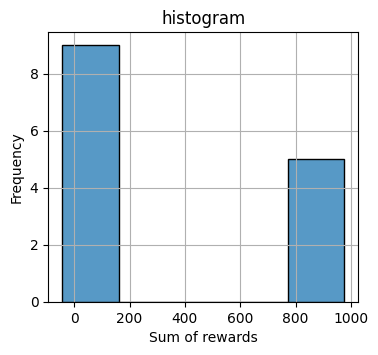

In [15]:
#Create experiment
exp = Experiment(num_rounds=100, \
                 num_episodes=1)
#Create and load environment
exp.load_test_suite("test_suite_wumpus.json")
#Create agent
agente = Heroe()
#Run the experiment
exp.run_experiment(agents=[agente], \
                   names=['Baseline'], \
                   measures=['histogram'],\
                   verbose=0)

In [16]:
df1 = exp.data.groupby(['environment', 'episode']).reward.sum().reset_index()
df1['extraction'] = df1['reward'] > 0
df1['extraction'].value_counts()

print('Porcentaje de extracción:', df1['extraction'].value_counts()[1] / sum(df1['extraction'].value_counts())*100)

Porcentaje de extracción: 35.714285714285715


C:\Users\sebas\AppData\Local\Temp\ipykernel_14188\887361762.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Porcentaje de extracción:', df1['extraction'].value_counts()[1] / sum(df1['extraction'].value_counts())*100)


In [17]:
def wumpus(self):
    formulas = []
    casillas = self.adyacentes(self.loc)
    for fila in range(4):
        for columna in range(4):
            formulas += [f'hedor({fila-1},{columna})&hedor({fila},{columna+1})&hedor({fila+1},{columna})>wumpus({fila},{columna})']
            formulas += [f'hedor({fila-1},{columna})&hedor({fila},{columna+1})&hedor({fila},{columna-1})>wumpus({fila},{columna})']
            formulas += [f'hedor({fila+1},{columna})&hedor({fila},{columna+1})&hedor({fila},{columna-1})>wumpus({fila},{columna})']
            formulas += [f'hedor({fila-1},{columna})&hedor({fila},{columna-1})&hedor({fila+1},{columna})>wumpus({fila},{columna})']
    return formulas

setattr(Heroe, 'wumpus', wumpus)

agente = Heroe()
agente.wumpus()




['hedor(-1,0)&hedor(0,1)&hedor(1,0)>wumpus(0,0)',
 'hedor(-1,0)&hedor(0,1)&hedor(0,-1)>wumpus(0,0)',
 'hedor(1,0)&hedor(0,1)&hedor(0,-1)>wumpus(0,0)',
 'hedor(-1,0)&hedor(0,-1)&hedor(1,0)>wumpus(0,0)',
 'hedor(-1,1)&hedor(0,2)&hedor(1,1)>wumpus(0,1)',
 'hedor(-1,1)&hedor(0,2)&hedor(0,0)>wumpus(0,1)',
 'hedor(1,1)&hedor(0,2)&hedor(0,0)>wumpus(0,1)',
 'hedor(-1,1)&hedor(0,0)&hedor(1,1)>wumpus(0,1)',
 'hedor(-1,2)&hedor(0,3)&hedor(1,2)>wumpus(0,2)',
 'hedor(-1,2)&hedor(0,3)&hedor(0,1)>wumpus(0,2)',
 'hedor(1,2)&hedor(0,3)&hedor(0,1)>wumpus(0,2)',
 'hedor(-1,2)&hedor(0,1)&hedor(1,2)>wumpus(0,2)',
 'hedor(-1,3)&hedor(0,4)&hedor(1,3)>wumpus(0,3)',
 'hedor(-1,3)&hedor(0,4)&hedor(0,2)>wumpus(0,3)',
 'hedor(1,3)&hedor(0,4)&hedor(0,2)>wumpus(0,3)',
 'hedor(-1,3)&hedor(0,2)&hedor(1,3)>wumpus(0,3)',
 'hedor(0,0)&hedor(1,1)&hedor(2,0)>wumpus(1,0)',
 'hedor(0,0)&hedor(1,1)&hedor(1,-1)>wumpus(1,0)',
 'hedor(2,0)&hedor(1,1)&hedor(1,-1)>wumpus(1,0)',
 'hedor(0,0)&hedor(1,-1)&hedor(2,0)>wumpus(1,0)',
 '

In [18]:
def bordear_wumpus(self):
    casillas = self.adyacentes(self.loc)
    for fila in range(4):
        for columna in range(4):
            objetivo = f'wumpus({fila},{columna})'
            if objetivo:
                acciones += ['voltearDerecha']
setattr(Heroe, 'bordear_wumpus', bordear_wumpus)

In [19]:
print(agente.base)

Hechos:

Reglas:
	-brisa(0, 0)>-pozo(1, 0)
	-brisa(0, 0)>-pozo(0, 1)
	-hedor(0, 0)>-wumpus(1, 0)
	-hedor(0, 0)>-wumpus(0, 1)
	-pozo(0, 0)&-wumpus(0, 0)>segura(0, 0)
	-pozo(0, 1)&-wumpus(0, 1)>segura(0, 1)
	-pozo(0, 2)&-wumpus(0, 2)>segura(0, 2)
	-pozo(0, 3)&-wumpus(0, 3)>segura(0, 3)
	-pozo(1, 0)&-wumpus(1, 0)>segura(1, 0)
	-pozo(1, 1)&-wumpus(1, 1)>segura(1, 1)
	-pozo(1, 2)&-wumpus(1, 2)>segura(1, 2)
	-pozo(1, 3)&-wumpus(1, 3)>segura(1, 3)
	-pozo(2, 0)&-wumpus(2, 0)>segura(2, 0)
	-pozo(2, 1)&-wumpus(2, 1)>segura(2, 1)
	-pozo(2, 2)&-wumpus(2, 2)>segura(2, 2)
	-pozo(2, 3)&-wumpus(2, 3)>segura(2, 3)
	-pozo(3, 0)&-wumpus(3, 0)>segura(3, 0)
	-pozo(3, 1)&-wumpus(3, 1)>segura(3, 1)
	-pozo(3, 2)&-wumpus(3, 2)>segura(3, 2)
	-pozo(3, 3)&-wumpus(3, 3)>segura(3, 3)

